<a href="https://colab.research.google.com/github/iskra3138/GluonTS/blob/master/1_1_GluonTS_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GluonTS - Probabilistic Time Series Modeling

Ref.: https://gluon-ts.mxnet.io/index.html#

Gluon Time Series (GluonTS) is the Gluon toolkit for probabilistic time series modeling, focusing on deep learning-based models.

GluonTS provides utilities for loading and iterating over time series datasets, state of the art models ready to be trained, and building blocks to define your own models and quickly experiment with different solutions. With GluonTS you can:

- Train and evaluate any of the built-in models on your own data, and quickly come up with a solution for your time series tasks.
- Use the provided abstractions and building blocks to create custom time series models, and rapidly benchmark them against baseline algorithms.

## 환경 구현

Colab에서 어떤 GPU가 할당되었는 지 확인

In [2]:
!nvidia-smi

Tue Apr 21 16:32:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

MXNET 설치 
- GluonTS는 Amazon이 2019년 공개한 Tool로서 MXNET을 backbone으로 사용
  - https://aws.amazon.com/blogs/machine-learning/creating-neural-time-series-models-with-gluon-time-series/

- 어떤 버전의 MXNET을 설치해야 하는 지는 아래 링크 참고
  - https://mxnet.apache.org/get_started/?platform=linux&language=python&processor=gpu&environ=pip&

In [3]:
# nvidia-smi로 CUDA Version 확인하고 해당되는 MXNET 설치
!pip install mxnet-cu101

     |████████████████████████████████| 710.5MB 25kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


colab에서 GluoTS Tutorial을 이용할 때 최신 pydantic package가 설치되면 아래 에러가 나오므로 1.4로 설치해줌
- TypeError: create_model() takes exactly 1 positional argument (0 given)


In [4]:
!pip install pydantic==1.4

     |████████████████████████████████| 7.5MB 413kB/s 


GluonTS를 설치함
- 설치가 완료되면 Restart Runtime Box를 클릭하여 Runtime을 재시작하고 Tutorial을 시작

In [5]:
!pip install gluonts

     |████████████████████████████████| 327kB 14.0MB/s 
     |████████████████████████████████| 235kB 48.6MB/s 
     |████████████████████████████████| 10.4MB 56.4MB/s 
     |████████████████████████████████| 194kB 60.6MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68033 sha256=47392cf287b33a25356a600594efefa0506b4b9755113c7ad30687315ad51609
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Succ

## Get Started: A Quick Example

Here is a simple time series example with GluonTS for predicting Twitter volume with DeepAR.

INFO:root:Using GPU
INFO:root:Using GPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:numexpr.utils:NumExpr defaulting to 2 threads.


learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Number of parameters in DeepARTrainingNetwork: 26844
100%|██████████| 50/50 [00:09<00:00,  5.44it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[0] Elapsed time 9.187 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.454088
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.47it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[1] Elapsed time 4.363 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=5.545211
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.87it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[2] Elapsed time 4.215 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=5.428249
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.54it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[3] Elapsed time 4.338 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.454446
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.74it/s, avg_epoch_loss=4.09]
INFO

[47.060867 48.577652 45.060577 46.163746 46.621338 43.990562 43.07549
 40.805786 41.26894  39.902355 45.05988  42.247013]


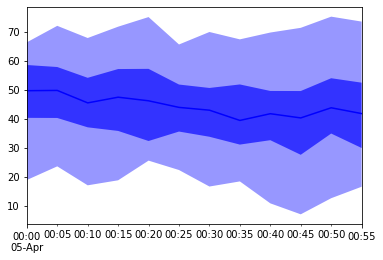

In [1]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.trainer import Trainer

import pandas as pd

url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
data = common.ListDataset([{"start": df.index[0],
                            "target": df.value[:"2015-04-05 00:00:00"]}],
                          freq="5min")

trainer = Trainer(epochs=10)
estimator = deepar.DeepAREstimator(freq="5min", prediction_length=12, trainer=trainer)
predictor = estimator.train(training_data=data)

prediction = next(predictor.predict(data))
print(prediction.mean)
prediction.plot(output_file='graph.png')

- 똑같은 코드를 CPU버전으로 돌려봤을 때와의 시간차이가 크지 않음
 - https://colab.research.google.com/github/iskra3138/GluonTS/blob/master/1.2.%20GluonTS_Intro_cpu.ipynb
- MXNET의 문제인지, 시계열 분석의 특징인지, DeepAR의 특징인지는 향후 검증 필요함!!! 

## Line별 실행
ref. : https://github.com/awslabs/gluon-ts/

This simple example illustrates how to train a model from GluonTS on some data, and then use it to make predictions. As a first step, we need to collect some data: in this example we will use the volume of tweets mentioning the AMZN ticker symbol.

In [0]:
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

In [4]:
# url의 dataset은 2개의 Columns(Timestamp, Value)과 15831개의 Rows(data points)로 구성되어 있음
print (df)

                     value
timestamp                 
2015-02-26 21:42:53     57
2015-02-26 21:47:53     43
2015-02-26 21:52:53     55
2015-02-26 21:57:53     64
2015-02-26 22:02:53     93
...                    ...
2015-04-22 20:32:53     51
2015-04-22 20:37:53     54
2015-04-22 20:42:53     46
2015-04-22 20:47:53     56
2015-04-22 20:52:53     50

[15831 rows x 1 columns]


The first 100 data points look like follows:

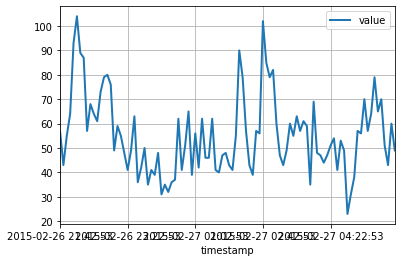

In [5]:
import matplotlib.pyplot as plt
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

We can now prepare a training dataset for our model to train on. Datasets in GluonTS are essentially iterable collections of dictionaries: each dictionary represents a time series with possibly associated features. For this example, we only have one entry, specified by the "start" field which is the timestamp of the first datapoint, and the "target" field containing time series data. For training, we will use data up to midnight on April 5th, 2015.

In [7]:
data = common.ListDataset([{"start": df.index[0],
                            "target": df.value[:"2015-04-05 00:00:00"]}],
                          freq="5min")
print (data)

In [6]:
# 학습에 사용되는 target은 2015년 4월 4일까지의 데이터 10684개가 됨
df.value[:"2015-04-05 00:00:00"]

timestamp
2015-02-26 21:42:53    57
2015-02-26 21:47:53    43
2015-02-26 21:52:53    55
2015-02-26 21:57:53    64
2015-02-26 22:02:53    93
                       ..
2015-04-04 23:37:53    31
2015-04-04 23:42:53    40
2015-04-04 23:47:53    44
2015-04-04 23:52:53    61
2015-04-04 23:57:53    59
Name: value, Length: 10684, dtype: int64

In [8]:
print (data.list_data)

[{'start': Timestamp('2015-02-26 21:40:00', freq='5T'), 'target': array([57., 43., 55., ..., 44., 61., 59.], dtype=float32)}]


A forecasting model in GluonTS is a predictor object. One way of obtaining predictors is by training a correspondent estimator. Instantiating an estimator requires specifying the frequency of the time series that it will handle, as well as the number of time steps to predict. In our example we're using 5 minutes data, so freq="5min", and we will train a model to predict the next hour, so prediction_length=12. We also specify some minimal training options.

In [9]:
trainer = Trainer(epochs=10)
print (trainer)

INFO:root:Using GPU


gluonts.trainer._base.Trainer(batch_size=32, clip_gradient=10.0, ctx=None, epochs=10, hybridize=True, init="xavier", learning_rate=0.001, learning_rate_decay_factor=0.5, minimum_learning_rate=5e-05, num_batches_per_epoch=50, patience=10, weight_decay=1e-08)


In [10]:
estimator = deepar.DeepAREstimator(freq="5min", prediction_length=12, trainer=trainer)
print (estimator)

gluonts.model.deepar._estimator.DeepAREstimator(cardinality=None, cell_type="lstm", context_length=None, distr_output=gluonts.distribution.student_t.StudentTOutput(), dropout_rate=0.1, embedding_dimension=None, freq="5min", lags_seq=None, num_cells=40, num_layers=2, num_parallel_samples=100, prediction_length=12, scaling=True, time_features=None, trainer=gluonts.trainer._base.Trainer(batch_size=32, clip_gradient=10.0, ctx=None, epochs=10, hybridize=True, init="xavier", learning_rate=0.001, learning_rate_decay_factor=0.5, minimum_learning_rate=5e-05, num_batches_per_epoch=50, patience=10, weight_decay=1e-08), use_feat_dynamic_real=False, use_feat_static_cat=False, use_feat_static_real=False)


In [11]:
predictor = estimator.train(training_data=data)

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Number of parameters in DeepARTrainingNetwork: 26844
100%|██████████| 50/50 [00:04<00:00, 10.64it/s, avg_epoch_loss=4.63]
INFO:root:Epoch[0] Elapsed time 4.701 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.629161
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 12.02it/s, avg_epoch_loss=4.16]
INFO:root:Epoch[1] Elapsed time 4.165 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.159329
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 12.00it/s, avg_epoch_loss=4.13]
INFO:root:Epoch[2] Elapsed time 4.170 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.129306
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 11.92it/s, avg_epoch_loss=4.07]
INFO:root:Epoch[3] Elapsed time 4.196 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.067420
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:04<00:00, 12.38it/s, avg_epoch_loss=5.54]
INFO

During training, useful information about the progress will be displayed. To get a full overview of the available options, please refer to the documentation of DeepAREstimator (or other estimators) and Trainer.

We're now ready to make predictions: we will forecast the hour following the midnight on April 15th, 2015.

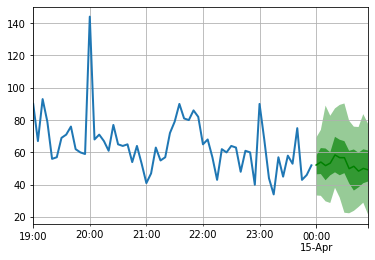

In [12]:
from gluonts.dataset.common import ListDataset


test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')

Note that the forecast is displayed in terms of a probability distribution: the shaded areas represent the 50% and 90% prediction intervals, respectively, centered around the median (dark green line).

original code test 예제

In [0]:
prediction = next(predictor.predict(data))
print  (prediction)

gluonts.model.forecast.SampleForecast(freq="5min", info=None, item_id=None, samples=numpy.array([[61.89003372192383, 43.472930908203125, 26.13532829284668, 40.04022216796875, 42.79454803466797, 42.42021179199219, 39.47874069213867, 41.99250030517578, 44.72181701660156, 48.14472961425781, 34.25071716308594, 48.01095199584961], [61.84659957885742, 45.27069854736328, 61.4107780456543, 46.40459442138672, 25.75678825378418, 35.54698944091797, 44.07526397705078, 43.25977325439453, 42.42564010620117, 35.342899322509766, 35.53315734863281, 46.68082809448242], [52.08669662475586, 63.20838165283203, 31.824674606323242, 47.775569915771484, 26.155141830444336, 51.911563873291016, 45.77846908569336, 30.1429386138916, 40.423683166503906, 42.653560638427734, 36.294063568115234, 58.19617462158203], [38.02675247192383, 59.04023742675781, 52.597652435302734, 53.219688415527344, 50.900325775146484, 46.80876541137695, 41.87510681152344, 49.1364631652832, 45.65569305419922, 32.87964630126953, 41.5698471069

In [0]:
prediction.samples.shape

(100, 12)

In [0]:
print(prediction.mean)

[54.643745 51.680374 48.61285  48.206364 43.921432 46.113583 43.821342
 43.775013 42.146465 42.206474 44.83072  49.84009 ]


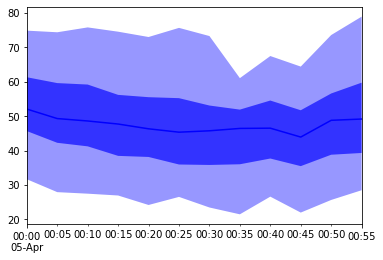

In [0]:
prediction.plot(output_file='graph.png')

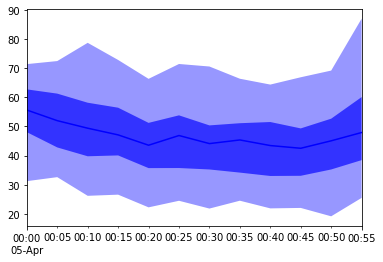

In [0]:
prediction.plot(output_file='graph.png')